In [2]:
import pandas as pd
import seaborn as sns


df = sns.load_dataset('titanic')

In [3]:
df.shape

(891, 15)

In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [6]:
((df.isnull().sum() / len(df))*100).sort_values(ascending=False)

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
sex             0.000000
pclass          0.000000
survived        0.000000
fare            0.000000
parch           0.000000
sibsp           0.000000
class           0.000000
adult_male      0.000000
who             0.000000
alive           0.000000
alone           0.000000
dtype: float64

In [7]:
#drop all the rows with na
df_dropna = df.dropna()
df_dropna.shape

(182, 15)

In [8]:
#drp columns with more than 40 percent of null values
threshold = 0.4
df_dropcols = df.loc[:, df.isnull().mean() < threshold]
df_dropcols.shape

(891, 14)

In [9]:
df_dropcols.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [10]:
#imputation

df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
df.age.mean()

np.float64(29.69911764705882)

In [12]:
#mean
df.age.fillna(df.age.mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [13]:
#median
df.age.fillna(df.age.median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [14]:
#constant
df.age.fillna(0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [15]:
#mode for categorical data
df.embarked.fillna(df.embarked.mode())

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [16]:
#mean, median, mode, constant using simple imputer

In [17]:
df_simple = df.copy()

In [18]:
df_simple.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
from sklearn.impute import SimpleImputer

# The imputation strategy.

# If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.

# If “median”, then replace missing values using the median along each column. Can only be used with numeric data.

# If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.

# If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.

In [20]:
median_imputer = SimpleImputer(strategy = 'median')
median_imputer

#median_imputer is an object of SimpleImputer
#median_imputer needs to calculate the median value >> fit
#replace the null value with this median value >> transform


,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [21]:
median_imputer.fit(df_simple[['age']]) #learns the median

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [22]:
df_simple['age'] = median_imputer.transform(df_simple[['age']]) #transform applies the learned median to the data

In [23]:
df_simple['age'].isna().sum()

np.int64(0)

In [24]:
df_simple['age'] = median_imputer.fit_transform(df_simple[['age']])

In [25]:
#embarked column

mode_imputer = SimpleImputer(strategy='most_frequent')
df_simple['embarked'] = mode_imputer.fit_transform(df_simple[['embarked']]).ravel() #it returns 2d array and .ravel will flatten

In [26]:
df_simple['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [27]:
df_simple[['embarked']].value_counts()

embarked
S           646
C           168
Q            77
Name: count, dtype: int64

In [28]:
#can fit and transform be used for both train and test data?
#fit_transform >> train data
#transform >> can be used for test data. why? because test data is representative of unseen data, 
#you can not learn anything from test data


#fit_transform>> in data pre processing
#fit_predict >> machine learning models >> fit and predict can be used on train data but on test data only predict


In [29]:
const_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
df_simple['embark_town'] = const_imputer.fit_transform(df[['embark_town']]).ravel()

In [30]:
df_simple['embark_town'].isna().sum()

np.int64(0)

In [31]:
#there is no difference in using simple imputer class and directly replacing mean median mode
#then why simple imputer?
#other pre-prepocessing steps (like scaling) have modular structure(class-object)
#so for uniformity of all the pre-processing steps imputation has also its own class
#very helpful in pipeline

In [32]:
#making a separate column for missing value flag

df_indicator = df.copy()

#create a binary column> 1 if missing else 0
df_indicator.age.isna().sum()

np.int64(177)

In [33]:
df_indicator['age_missing'] = df_indicator['age'].isnull().astype(int)

In [34]:
#for rest of the misisng value do eith mean or median imputation
df_indicator['age'] = median_imputer.fit_transform(df[['age']]).ravel()

In [35]:
df_indicator.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_missing      0
dtype: int64

In [36]:
df_indicator.age_missing

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: age_missing, Length: 891, dtype: int64

In [37]:
#KNN imputer

from sklearn.impute import KNNImputer #using knn algorithm model
from sklearn.preprocessing import LabelEncoder #to convert string value to numbers

df_knn = df[['age', 'fare', 'embarked', 'pclass']].copy()
df_knn

,age,fare,embarked,pclass
0,22.0,7.2500,S,3
1,38.0,71.2833,C,1
2,26.0,7.9250,S,3
3,35.0,53.1000,S,1
4,35.0,8.0500,S,3
...,...,...,...,...
886,27.0,13.0000,S,2
887,19.0,30.0000,S,1
888,NaN,23.4500,S,3
889,26.0,30.0000,C,1


In [38]:
df_knn.isna().sum()

age         177
fare          0
embarked      2
pclass        0
dtype: int64

In [39]:
df_knn['embarked'] = df_knn['embarked'].astype(str)
le = LabelEncoder()
df_knn['embarked'] = le.fit_transform(df_knn['embarked'])

In [40]:
df_knn

,age,fare,embarked,pclass
0,22.0,7.2500,2,3
1,38.0,71.2833,0,1
2,26.0,7.9250,2,3
3,35.0,53.1000,2,1
4,35.0,8.0500,2,3
...,...,...,...,...
886,27.0,13.0000,2,2
887,19.0,30.0000,2,1
888,NaN,23.4500,2,3
889,26.0,30.0000,0,1


In [41]:
#apply knn imputer
knn_imputer = KNNImputer(n_neighbors=5) #take the average of 5 nearest value for imputation
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns = df_knn.columns)

In [44]:
df_indicator['age_missing'] = df_indicator['age'].isnull().astype(int).isna().sum()

In [ ]:
df_knn_imputed 

,age,fare,embarked,pclass
0,22.0,7.2500,2.0,3.0
1,38.0,71.2833,0.0,1.0
2,26.0,7.9250,2.0,3.0
3,35.0,53.1000,2.0,1.0
4,35.0,8.0500,2.0,3.0
...,...,...,...,...
886,27.0,13.0000,2.0,2.0
887,19.0,30.0000,2.0,1.0
888,27.8,23.4500,2.0,3.0
889,26.0,30.0000,0.0,1.0


In [45]:
#mice>> multivariate imputation by chained equation
#Multivariate imputer that estimates each feature from all the others.
# A strategy for imputing missing values by modeling each feature
# with missing values as a function of other features in a round-robin fashion.
#by default BayesianRidge() is used


from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

df_mice = df[['age', 'fare', 'pclass', 'sibsp']].copy()

mice_imputer = IterativeImputer(random_state=42)
df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

print(df_mice_imputed.head())


    age     fare  pclass  sibsp
0  22.0   7.2500     3.0    1.0
1  38.0  71.2833     1.0    1.0
2  26.0   7.9250     3.0    0.0
3  35.0  53.1000     1.0    1.0
4  35.0   8.0500     3.0    0.0


In [ ]:
df_mice_imputed.isna().sum()

age       0
fare      0
pclass    0
sibsp     0
dtype: int64

In [ ]:
#interpolation
df_interp = df[['age', 'fare']].copy()

df_interp = df_interp.sort_values(by='age')
df_interp['age'] = df_interp['age'].interpolate(method='linear')
df_interp['fare'] = df_interp['fare'].interpolate(method='linear')


df_interp.head()

,age,fare
803,0.42,8.5167
755,0.67,14.5000
644,0.75,19.2583
469,0.75,19.2583
78,0.83,29.0000


In [ ]:
df_interp.isna().sum()

age     0
fare    0
dtype: int64

In [ ]:
#for time series imputation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a date range
date_range = pd.date_range(start='2024-01-01', periods=30, freq='D')
temps = np.random.normal(25, 3, size=30)
temps[[5, 8, 12, 20]] = np.nan  # introduce missing values

df = pd.DataFrame({'date': date_range, 'temp': temps}).set_index('date')

In [ ]:
df

,temp
date,
2024-01-01,20.324265
2024-01-02,22.817004
2024-01-03,27.068950
2024-01-04,26.887211
2024-01-05,26.505269
2024-01-06,NaN
2024-01-07,25.777222
2024-01-08,27.277201
2024-01-09,NaN


In [ ]:
df.isnull().sum()

temp    4
dtype: int64

In [ ]:
#ffill >> filled by previous value

df_ffill = df.copy()
df_ffill['temp'] = df_ffill['temp'].fillna(method='ffill')


C:\Users\Punjab School\AppData\Local\Temp\ipykernel_4964\1858682576.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill['temp'] = df_ffill['temp'].fillna(method='ffill')


In [ ]:
df_ffill

,temp
date,
2024-01-01,20.324265
2024-01-02,22.817004
2024-01-03,27.068950
2024-01-04,26.887211
2024-01-05,26.505269
2024-01-06,26.505269
2024-01-07,25.777222
2024-01-08,27.277201
2024-01-09,27.277201


In [ ]:
#bfill >> backward fill>> next value

df_bfill = df.copy()
df_bfill['temp'] = df_bfill['temp'].fillna(method='bfill')


C:\Users\Punjab School\AppData\Local\Temp\ipykernel_4964\2245154985.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill['temp'] = df_bfill['temp'].fillna(method='bfill')


In [ ]:
#rolling mean

df_roll = df.copy()
df_roll['temp'] = df_roll['temp'].fillna(df_roll['temp'].rolling(window=2, min_periods=1).mean())

In [ ]:
df_roll

,temp
date,
2024-01-01,20.324265
2024-01-02,22.817004
2024-01-03,27.068950
2024-01-04,26.887211
2024-01-05,26.505269
2024-01-06,26.505269
2024-01-07,25.777222
2024-01-08,27.277201
2024-01-09,27.277201


In [ ]:
#linear interpolation >> Straight line between known points.
df_interp = df.copy()
df_interp['temp'] = df_interp['temp'].interpolate(method='linear')

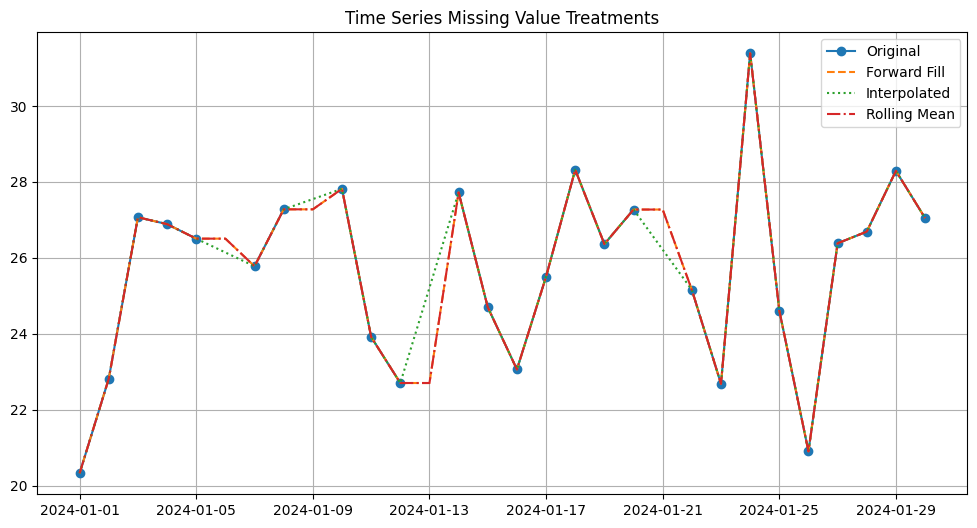

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df, label='Original', marker='o')
plt.plot(df_ffill, label='Forward Fill', linestyle='--')
plt.plot(df_interp, label='Interpolated', linestyle=':')
plt.plot(df_roll, label='Rolling Mean', linestyle='-.')
plt.legend()
plt.title("Time Series Missing Value Treatments")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create time series with missing values
dates = pd.date_range('2023-01-01', periods=10)
values = [10, np.nan, np.nan, 16, 18, np.nan, 22, 24, np.nan, 28]

df = pd.DataFrame({'date': dates, 'value': values}).set_index('date')


In [ ]:
#time based interpolation
df_time = df.copy()
df_time['value'] = df_time['value'].interpolate(method='time')

# Like linear, but adjusts for actual time difference between dates., Best for: Irregular time intervals

In [ ]:
#index interploation>> Interpolates along the index (useful if index is numeric or time)
df_index = df.copy()
df_index['value'] = df_index['value'].interpolate(method='index')


In [ ]:
#polynomial interpolation>> Best for: Curved trends (e.g., parabolic),Risky with outliers or short data 
df_poly = df.copy()
df_poly['value'] = df_poly['value'].interpolate(method='polynomial', order=2)


In [ ]:
#Spline Interpolation>> Fits a smooth spline curve through points., smooth transitions, needs enough data points

In [ ]:
df_spline = df.copy()
df_spline['value'] = df_spline['value'].interpolate(method='spline', order=2)


In [ ]:
#why interpolate
#preserve trends, User temporal structure, works on continuous data


#major type of interpolation

#linear interpolation
#cubic interpolation
#polynomial interpolation

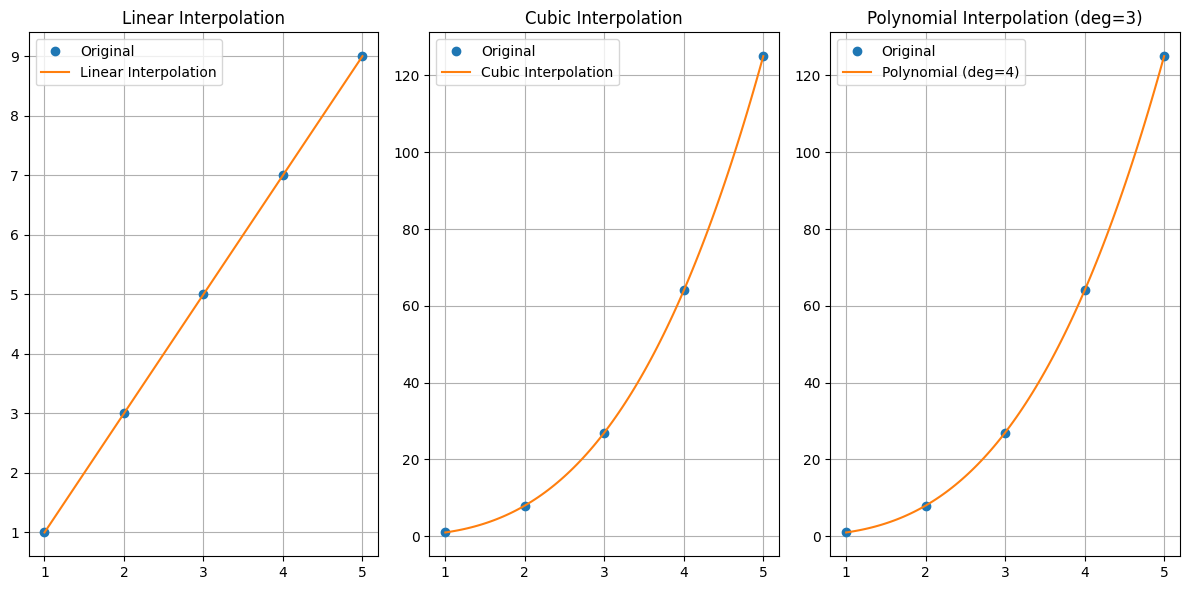

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Original data
x = np.array([1, 2, 3, 4, 5])
y_linear = np.array([1, 3, 5, 7, 9])       # Linear
y_cubic = np.array([1, 8, 27, 64, 125])    # y = x^3 (Cubic)

# New x values (interpolated points)
x_new = np.linspace(1, 5, 100)

#Linear Interpolation
f_linear = interp1d(x, y_linear, kind='linear')
y_linear_interp = f_linear(x_new)

#Cubic Interpolation 
f_cubic = interp1d(x, y_cubic, kind='cubic')
y_cubic_interp = f_cubic(x_new)

#Polynomial Interpolation (e.g., degree 3 fit) 
# We'll use numpy's polyfit + polyval for general polynomial
coeffs = np.polyfit(x, y_cubic, deg=4)   # Fit a 4th-degree polynomial
y_poly_interp = np.polyval(coeffs, x_new)

# Plotting 
plt.figure(figsize=(12, 6))

# Linear
plt.subplot(1, 3, 1)
plt.plot(x, y_linear, 'o', label='Original')
plt.plot(x_new, y_linear_interp, '-', label='Linear Interpolation')
plt.title("Linear Interpolation")
plt.legend()
plt.grid()

# Cubic
plt.subplot(1, 3, 2)
plt.plot(x, y_cubic, 'o', label='Original')
plt.plot(x_new, y_cubic_interp, '-', label='Cubic Interpolation')
plt.title("Cubic Interpolation")
plt.legend()
plt.grid()

# Polynomial Fit (degree 3)
plt.subplot(1, 3, 3)
plt.plot(x, y_cubic, 'o', label='Original')
plt.plot(x_new, y_poly_interp, '-', label='Polynomial (deg=4)')
plt.title("Polynomial Interpolation (deg=3)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()